In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

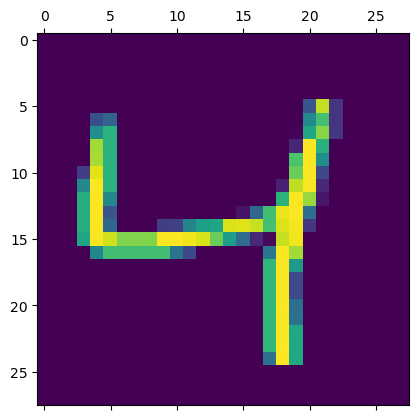

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 3ms/step - loss: 9.8628 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1140 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6374 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3800 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4093 - accuracy: 0.8870


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 6.0044 - accuracy: 0.8860


[6.004376411437988, 0.8859999775886536]

# SCALLING THE RESULTS TO INCREASE THE ACCURACY

In [16]:
X_train2=X_train/255
X_test2=X_test/255

In [17]:
X_train_flattened2=X_train2.reshape(len(X_train2),28*28)
X_test_flattened2=X_test2.reshape(len(X_test2),28*28)

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4794 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3051 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2839 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9252


In [19]:
model.evaluate(X_test_flattened2,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9262


[0.2661036252975464, 0.9261999726295471]

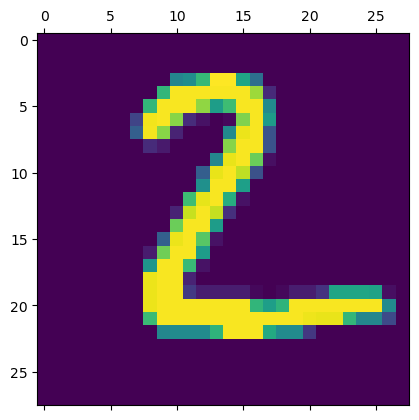

In [20]:
plt.matshow(X_test[1])

In [21]:
y_predicted=model.predict(X_test_flattened2)
y_predicted[1]

313/313 [==============================] - 2s 3ms/step


array([3.7438062e-01, 1.0482936e-02, 9.9934125e-01, 2.4069172e-01,
       4.9185817e-10, 8.6766750e-01, 7.9236466e-01, 1.1088766e-12,
       1.2052224e-01, 3.9041974e-09], dtype=float32)

In [22]:
np.argmax(y_predicted[1])

2

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    1,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,   10,  928,   13,    8,    3,   11,    9,   43,    3],
       [   4,    1,   22,  910,    1,   31,    2,    8,   22,    9],
       [   1,    1,    4,    1,  911,    0,   11,    3,   10,   40],
       [  11,    3,    4,   25,   11,  779,   16,    4,   32,    7],
       [  12,    3,    7,    1,    7,   11,  912,    2,    3,    0],
       [   1,    7,   24,    9,    8,    0,    0,  933,    4,   42],
       [   6,   10,    5,   18,    9,   21,    9,    7,  881,    8],
       [  10,    7,    1,    9,   23,    6,    0,   13,   10,  930]])>

Text(95.72222222222221, 0.5, 'Truth')

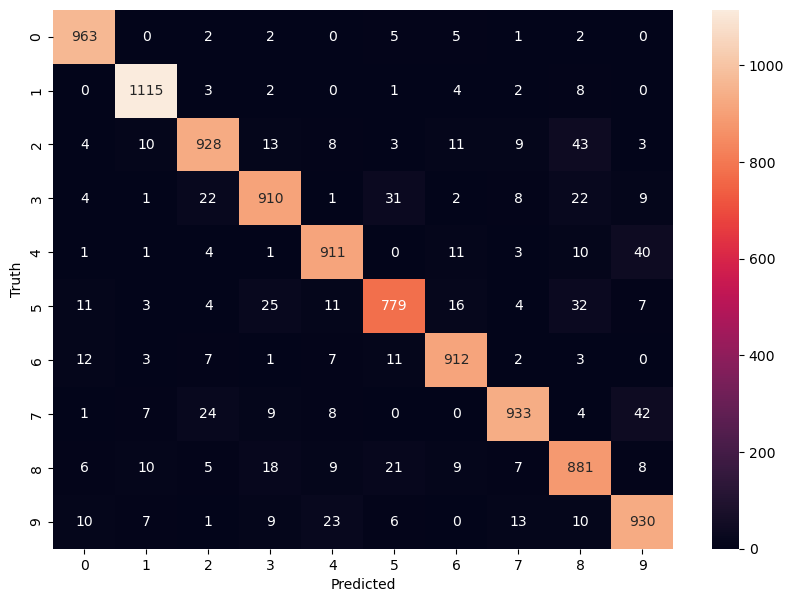

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# USING HIDDEN LAYER

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2710 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1246 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0863 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0667 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0512 - accuracy: 0.9843


313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

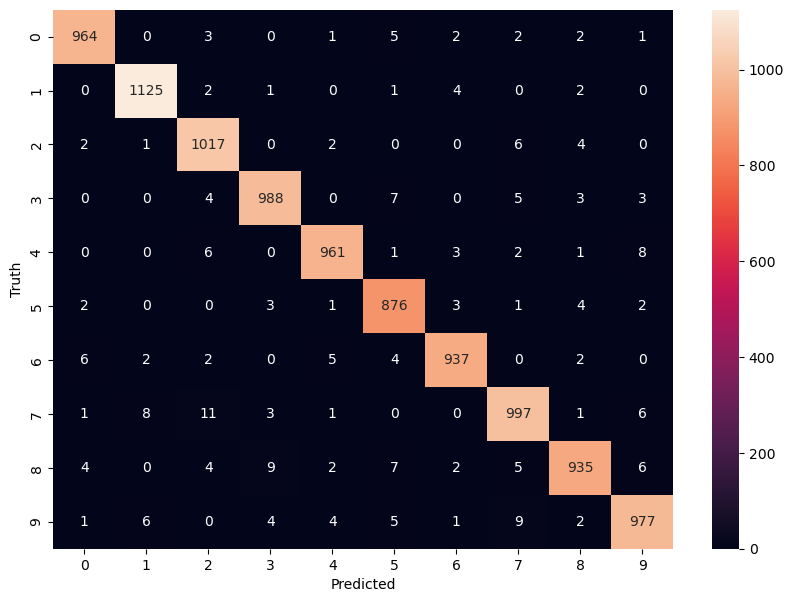

In [28]:
y_predicted=model.predict(X_test_flattened2)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.8103 - accuracy: 0.8403
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4228 - accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3178 - accuracy: 0.9193
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2577 - accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2328 - accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2146 - accuracy: 0.9448
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2005 - accuracy: 0.9478
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1935 - accuracy: 0.9510
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1835 - accuracy: 0.9530
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.180